# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.06398675 2.76823998 2.93358625 2.37741721 2.11271268 2.14408901
 2.72751488 2.72034146 2.09192325 2.86072416]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [27]:
# Question 1
def my_random_uniform_array(a,b,c):
    my_uniform = uniform(a, b)
    x = my_uniform.rvs(size=c)
    return x

In [28]:
# Question 2
first_one = my_random_uniform_array(10,5,100)
first_one

array([12.75446615, 10.35064317, 14.42984673, 12.50944918, 14.26915553,
       11.4369953 , 12.86199076, 12.60701355, 14.89006034, 10.38510265,
       10.31099898, 10.0999129 , 11.36015391, 13.01476173, 13.48156662,
       11.92273422, 13.26704648, 14.9291542 , 13.65811548, 11.32812018,
       13.14900301, 13.81362454, 12.28760177, 12.11296663, 10.9539547 ,
       13.4917546 , 13.07646805, 11.9480851 , 11.8219772 , 14.86894271,
       10.58464424, 11.28757647, 14.63546427, 14.47752106, 11.26493687,
       11.11952122, 12.77277889, 13.67850253, 13.30912471, 13.84383527,
       12.26302431, 13.6895461 , 10.1560378 , 12.26328823, 13.59757687,
       11.89635605, 12.25171568, 10.75720572, 14.7756429 , 14.6183762 ,
       14.90983622, 12.55402401, 11.8686429 , 11.33108712, 13.86005406,
       12.61845732, 13.58531369, 14.33943652, 10.71523194, 11.4680395 ,
       12.92348511, 12.71601272, 14.91523627, 14.23976243, 13.14724004,
       14.35224846, 11.7250735 , 11.30866593, 13.78424478, 10.48

In [29]:
second_one = my_random_uniform_array(10,50,1000)
second_one[:100]

array([32.16181152, 22.03706909, 35.44999335, 54.19141091, 41.4867233 ,
       22.75577768, 53.99829475, 21.36215898, 47.73345019, 24.40824173,
       28.1091893 , 55.33502728, 45.10527258, 49.32264728, 36.21264349,
       22.59232353, 26.23932847, 15.2826893 , 10.22168284, 17.07857388,
       41.43846441, 19.75017266, 52.55203435, 39.9432131 , 36.55602271,
       13.62279338, 59.46958497, 56.47616207, 50.53458253, 41.38565084,
       26.07734896, 10.58016171, 37.63962286, 23.22189549, 37.31741433,
       26.55782791, 48.83884748, 37.29243253, 46.31787135, 28.87002076,
       26.89823541, 44.33045134, 55.15511257, 33.45869244, 22.85405738,
       40.50277506, 13.9478499 , 22.44484218, 35.65316025, 56.27986974,
       30.33318913, 54.77059382, 40.22271764, 45.25945915, 24.5070099 ,
       41.07720836, 42.22336083, 11.96239973, 46.41771637, 18.49178047,
       21.67365283, 22.29150168, 43.2497459 , 14.75812544, 25.91660482,
       22.89305202, 19.01855199, 28.20476167, 56.3431523 , 42.36

How are the two distributions different?

In [14]:
# Question 3
import seaborn as sns

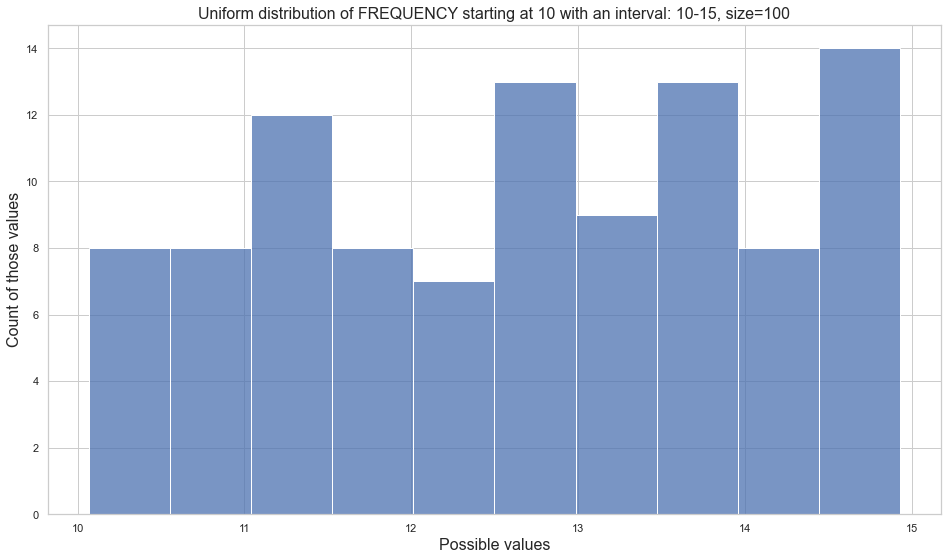

In [30]:
fig1 = sns.histplot(first_one, bins=10)
plt.xlabel("Possible values", fontsize=16)
plt.ylabel("Count of those values", fontsize=16)
fig1.set_title(f"Uniform distribution of FREQUENCY starting at 10 with an interval: 10-15, size={len(first_one)}", fontsize=16);


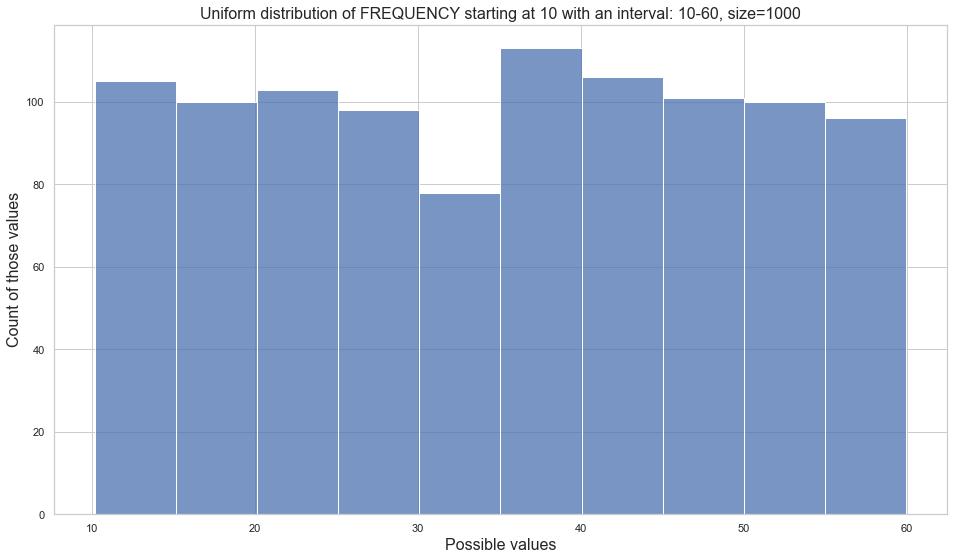

In [31]:
fig2 = sns.histplot(second_one, bins=10)
plt.xlabel("Possible values", fontsize=16)
plt.ylabel("Count of those values", fontsize=16)
fig2.set_title(f"Uniform distribution of FREQUENCY starting at 10 with an interval: 10-60, size={len(second_one)}", fontsize=16);


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [32]:
from scipy.stats import norm

In [33]:
# Question 1
def my_random_normal_array(a,b,c):
    my_normal = norm(a,b)
    x = my_normal.rvs(c)
    return x


In [36]:
# Question 2
first_normal = my_random_normal_array(10,1,1000)
first_normal[:10]

array([10.61044155,  9.95297152,  7.91463498, 10.8682231 ,  9.64305768,
       10.57508501,  9.97014705, 10.41798706,  8.90480612, 10.9660592 ])

In [37]:
# Question 3
second_normal = my_random_normal_array(10,50,1000)
second_normal[:10]

array([-29.98027932, -26.29373568, -46.08647954, -71.12400916,
        23.46104558, -14.30619503,  36.28016253,   4.52500568,
         9.19982631, -58.02932137])

How are the two distributions different?

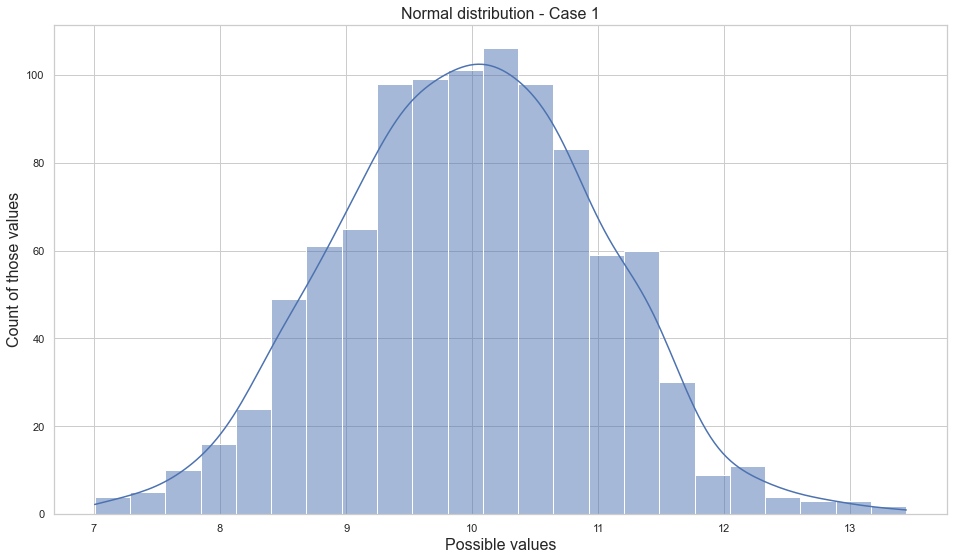

In [41]:
# Question 4

# Plotting the first one:

fig3 = sns.histplot(first_normal, kde=True)
plt.xlabel("Possible values", fontsize=16)
plt.ylabel("Count of those values", fontsize=16)
fig3.set_title(("Normal distribution - Case 1"), fontsize=16);
fig3;

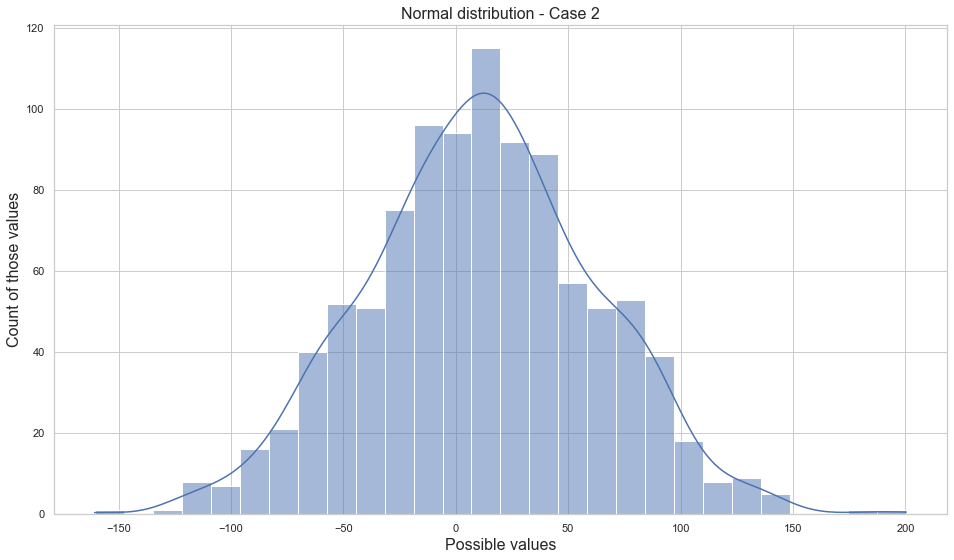

In [46]:
# Plotting the second one:

fig4 = sns.histplot(second_normal, kde=True)
plt.xlabel("Possible values", fontsize=16)
plt.ylabel("Count of those values", fontsize=16)
fig4.set_title(("Normal distribution - Case 2"), fontsize=16)
fig4;

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [48]:
import pandas as pd

In [49]:
vehicles = pd.read_csv("../your-code/vehicles.csv", index_col=0,encoding = 'unicode_escape')
vehicles

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [50]:
vehicles["Fuel Barrels/Year"].mean()

17.609055502328875

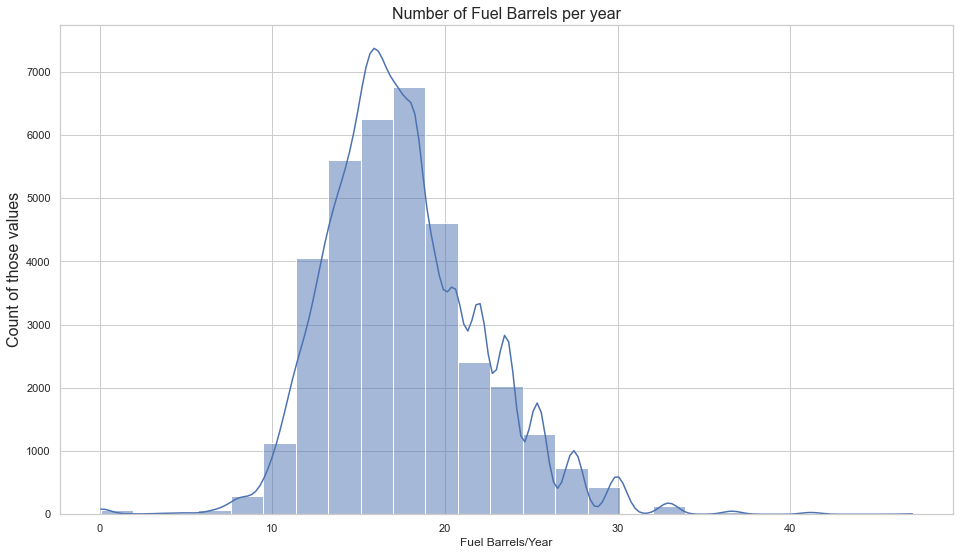

In [68]:
figure_barrels = sns.histplot(data=vehicles, x= "Fuel Barrels/Year",kde=True,bins=25)
plt.ylabel("Count of those values", fontsize=16)
figure_barrels.set_title(("Number of Fuel Barrels per year"), fontsize=16)
figure_barrels;

2. CO2 Emission Grams/Mile 

In [60]:
# your code here
vehicles["CO2 Emission Grams/Mile"].mean()

475.31633925715045

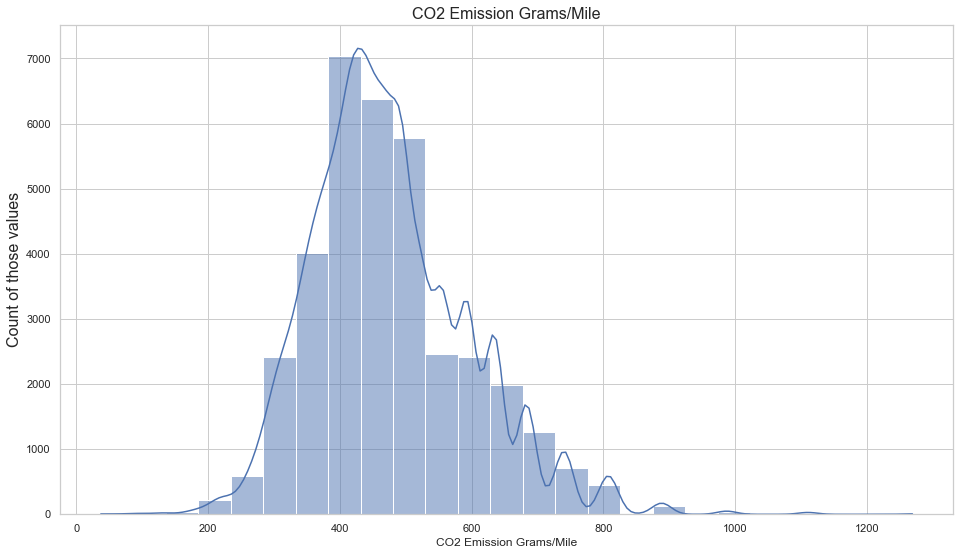

In [67]:
figure_emissions = sns.histplot(data=vehicles, x= "CO2 Emission Grams/Mile",kde=True,bins=25)
plt.ylabel("Count of those values", fontsize=16)
figure_emissions.set_title(("CO2 Emission Grams/Mile"), fontsize=16)
figure_emissions;

3. Combined MPG

In [62]:
# your code here
vehicles["Combined MPG"].mean()

19.92932242990654

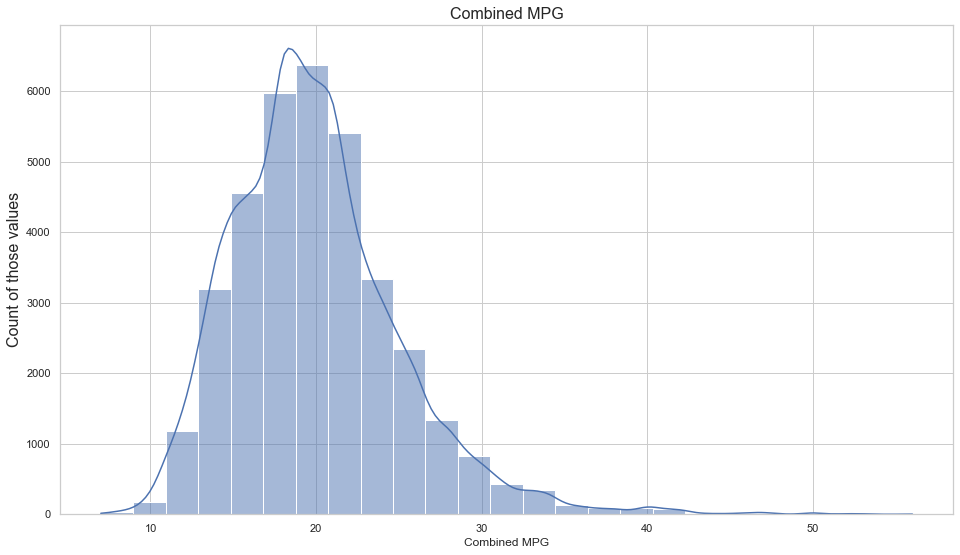

In [66]:
figure_combined = sns.histplot(data=vehicles, x= "Combined MPG",kde=True,bins=25)
plt.ylabel("Count of those values", fontsize=16)
figure_combined.set_title(("Combined MPG"), fontsize=16)
figure_combined;

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# your answer here - The third one (it's the one more bell shaped which means the data is more normally distributed on both sides of the mean)

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 2 and 200. 

1. Use the function to generate two number sequences with the size of 1000 for both.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [70]:
# your code here
from scipy.stats import expon
import numpy as np

In [84]:
def my_random_exp(a):
    sample = np.random.exponential(a, 10000)
    return sample

In [85]:
size_ten = my_random_exp(2)
size_ten

array([0.66301851, 0.14726237, 0.57869827, ..., 3.09061516, 0.77153141,
       0.83794947])

In [86]:
size_hundred = my_random_exp(200)
size_hundred

array([262.45095063, 123.9757256 , 114.60878733, ..., 194.73887365,
       155.51731725,  22.91553115])

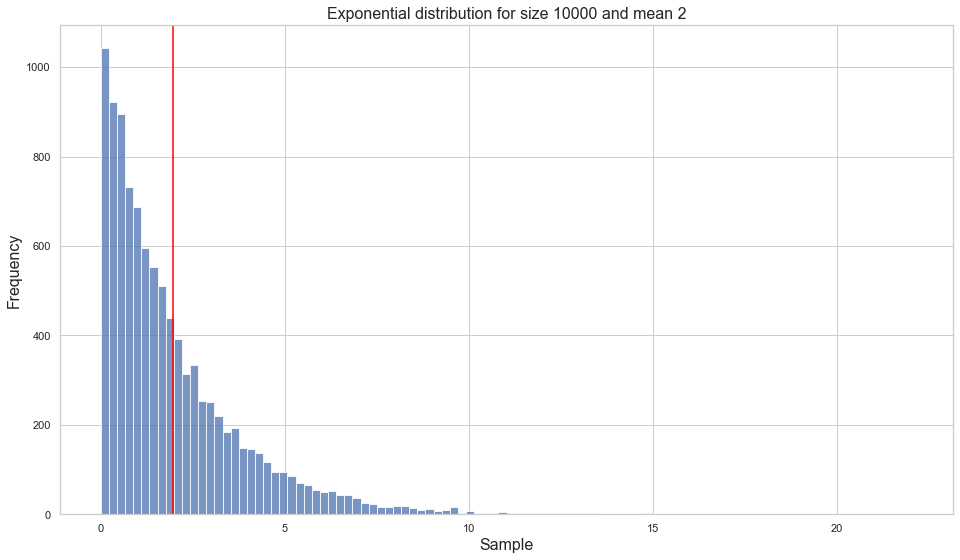

In [96]:
fig5 = sns.histplot(size_ten,bins=100)
fig5.axvline(x = size_ten.mean(), color="red")
plt.xlabel("Sample",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
fig5.set_title("Exponential distribution for size 10000 and mean 2",fontsize=16);

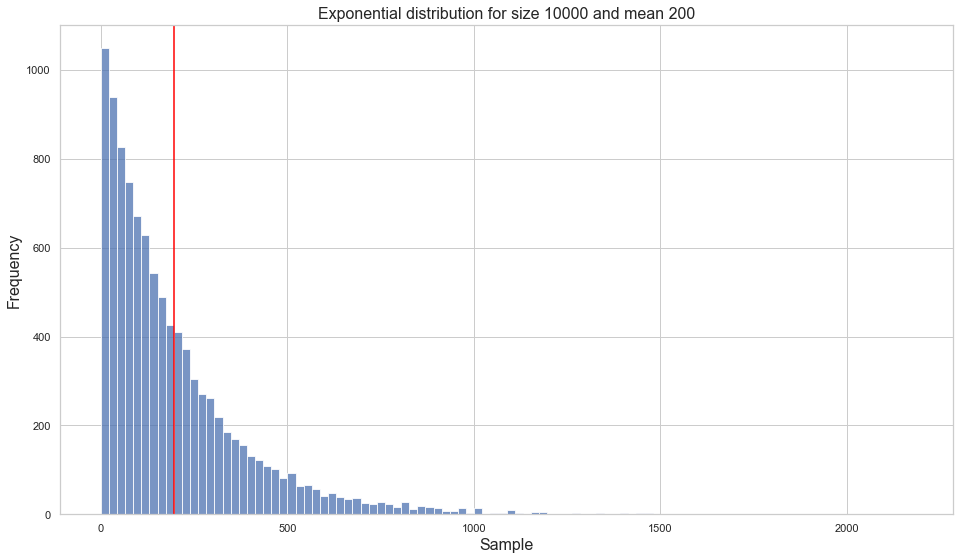

In [97]:
fig6 = sns.histplot(size_hundred,bins=100)
fig6.axvline(x = size_hundred.mean(), color="red")
plt.xlabel("Sample",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
fig6.set_title("Exponential distribution for size 10000 and mean 200",fontsize=16);

How are the two distributions different?

In [ ]:
# your answer here - They are exactly distributed in the same way, but with a different mean (one 2 and another one 200)

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [94]:
# your answer here
# Hint: This is same as saying P(x<15)
my_exp = expon(scale=10)
prob_less_than_fifteen = my_exp.cdf(15)
prob_less_than_fifteen

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [ ]:
# your answer here

In [95]:
prob_more_than_fifteen = 1 - prob_less_than_fifteen
prob_more_than_fifteen

0.2231301601484298

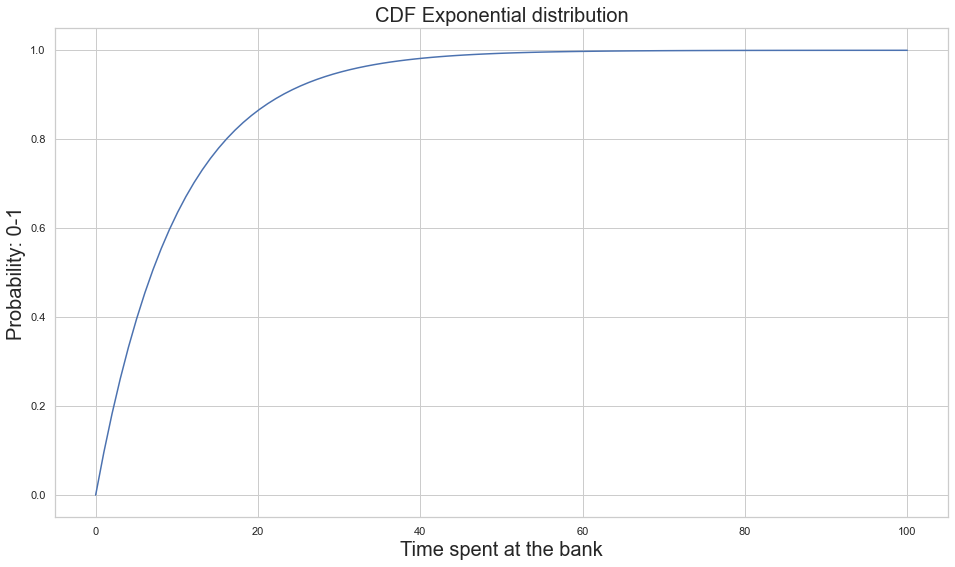

In [99]:
x = np.linspace(0, 100, 100)
y = my_exp.cdf(x)
plt.xlabel("Time spent at the bank", fontsize=20)
plt.ylabel("Probability: 0-1", fontsize=20)
plt.title("CDF Exponential distribution", fontsize=20)
plt.plot(x, y);